# HEART DISEASE PROJECT DATASET

In [31]:
### Import Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [32]:
### Import Dataset

Data = pd.read_csv('/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/HEART DISEASE PROJECT/Data/Heart Disease data.csv')
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [33]:
Data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [34]:
### Rearange Feature Names

Data = Data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [35]:
Data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
Data = Data[Data['target'] == 1]

In [37]:
### See Total rows and columns in dataset

Data.shape

(526, 14)

In [38]:
### Is there any duplicated rows in this dataset find that count

Data.duplicated().sum()

362

In [39]:
### Remove Duplicate rows
Data.drop_duplicates(inplace= True)

In [40]:
### shape of dataset after droping Dataset
Data.shape

(164, 14)

In [41]:
### find NAN Value features

Data.isnull().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       0
cholesterol                  0
fasting_blood_sugar          0
resting_electrocardiogram    0
max_heart_rate_achieved      0
exercise_induced_angina      0
st_depression                0
st_slope                     0
num_major_vessels            0
thalassemia                  0
target                       0
dtype: int64

In [42]:
#### identify the features Datatypes
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 5 to 733
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        164 non-null    int64  
 1   sex                        164 non-null    int64  
 2   chest_pain_type            164 non-null    int64  
 3   resting_blood_pressure     164 non-null    int64  
 4   cholesterol                164 non-null    int64  
 5   fasting_blood_sugar        164 non-null    int64  
 6   resting_electrocardiogram  164 non-null    int64  
 7   max_heart_rate_achieved    164 non-null    int64  
 8   exercise_induced_angina    164 non-null    int64  
 9   st_depression              164 non-null    float64
 10  st_slope                   164 non-null    int64  
 11  num_major_vessels          164 non-null    int64  
 12  thalassemia                164 non-null    int64  
 13  target                     164 non-null    int64  

In [43]:
#### how categories include eack features
for feature in Data.columns:
    print(f'{feature} total Categories: {len(Data[feature].unique())}')

age total Categories: 40
sex total Categories: 2
chest_pain_type total Categories: 4
resting_blood_pressure total Categories: 39
cholesterol total Categories: 104
fasting_blood_sugar total Categories: 2
resting_electrocardiogram total Categories: 3
max_heart_rate_achieved total Categories: 67
exercise_induced_angina total Categories: 2
st_depression total Categories: 26
st_slope total Categories: 3
num_major_vessels total Categories: 5
thalassemia total Categories: 4
target total Categories: 1


In [44]:
### Create a list only include >= categorical featires

cat_features_grater_10 = [feature for feature in Data.columns if len(Data[feature].unique()) >= 10]
cat_features_grater_10

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression']

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_4975/815468193.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature])


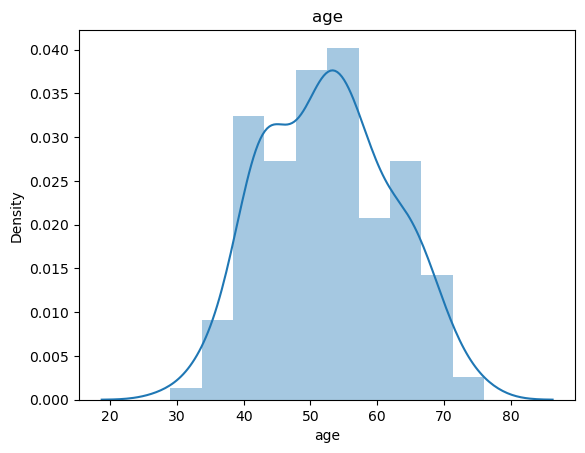

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_4975/815468193.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature])


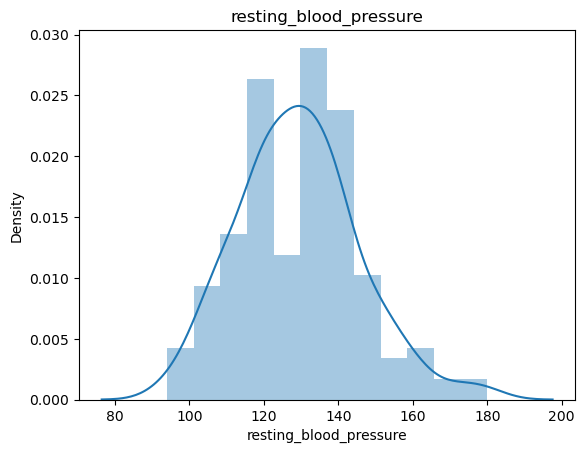

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_4975/815468193.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature])


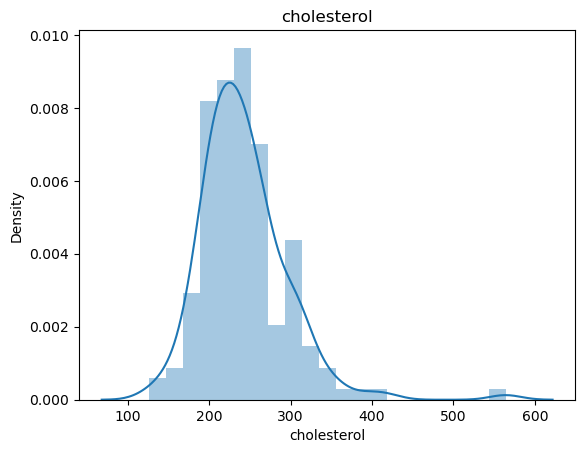

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_4975/815468193.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature])


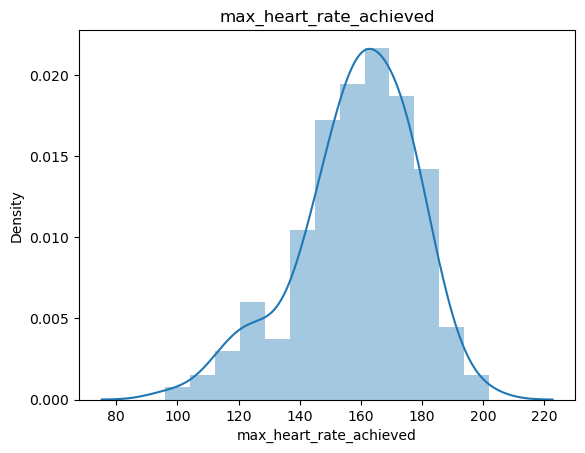

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_4975/815468193.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data[feature])


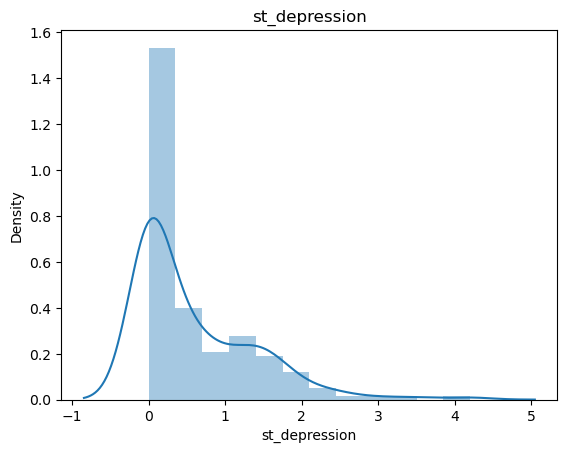

In [46]:
### Distribution plot

for feature in cat_features_grater_10:
    sns.distplot(Data[feature])
    plt.title(feature)
    plt.xlabel(feature)
    plt.show()

In [51]:
#### Convert features numarical values into string values

Data['sex'][Data['sex'] == 0] = 'Female'
Data['sex'][Data['sex'] == 1] = 'Male'

Data['chest_pain_type'][Data['chest_pain_type'] == 0] = 'typical angina'
Data['chest_pain_type'][Data['chest_pain_type'] == 1] = 'atypical angina'
Data['chest_pain_type'][Data['chest_pain_type'] == 2] = 'non-anginal pain'
Data['chest_pain_type'][Data['chest_pain_type'] == 3] = 'asymptomatic'

Data['fasting_blood_sugar'][Data['fasting_blood_sugar'] == 0] = 'lower then 120mg/ml'
Data['fasting_blood_sugar'][Data['fasting_blood_sugar'] == 1] = 'heigher then 120mg/ml'

Data['resting_electrocardiogram'][Data['resting_electrocardiogram'] == 0] = 'normal'
Data['resting_electrocardiogram'][Data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
Data['resting_electrocardiogram'][Data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

Data['exercise_induced_angina'][Data['exercise_induced_angina'] == 0] = 'no'
Data['exercise_induced_angina'][Data['exercise_induced_angina'] == 1] = 'yes'

Data['st_slope'][Data['st_slope'] == 0] = 'upsloping'
Data['st_slope'][Data['st_slope'] == 1] = 'flat'
Data['st_slope'][Data['st_slope'] == 2] = 'downsloping'

Data['thalassemia'][Data['thalassemia'] == 1] = 'fixed defect'
Data['thalassemia'][Data['thalassemia'] == 2] = 'normal'
Data['thalassemia'][Data['thalassemia'] == 3] = 'reversable defect'

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_4975/2595356723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['sex'][Data['sex'] == 0] = 'Female'
/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_4975/2595356723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['chest_pain_type'][Data['chest_pain_type'] == 0] = 'typical angina'
/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_4975/2595356723.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [52]:
Data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
5,58,Female,typical angina,100,248,lower then 120mg/ml,normal,122,no,1.0,flat,0,normal,1
10,71,Female,typical angina,112,149,lower then 120mg/ml,ST-T wave abnormality,125,no,1.6,flat,0,normal,1
12,34,Female,atypical angina,118,210,lower then 120mg/ml,ST-T wave abnormality,192,no,0.7,downsloping,0,normal,1
16,51,Female,non-anginal pain,140,308,lower then 120mg/ml,normal,142,no,1.5,downsloping,1,normal,1
18,50,Female,atypical angina,120,244,lower then 120mg/ml,ST-T wave abnormality,162,no,1.1,downsloping,0,normal,1


In [56]:
Data.to_csv('cleaned_data_1.csv', index= False)